<a href="https://colab.research.google.com/github/SquirrelMan/DNN/blob/master/MiniBooNE_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# https://keras.io/
!pip install -q keras
import keras
import tensorflow as tf
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from __future__ import print_function
%matplotlib inline


Using TensorFlow backend.


In [0]:

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving MiniBooNE_PID.txt to MiniBooNE_PID.txt
User uploaded file "MiniBooNE_PID.txt" with length 91174877 bytes


In [0]:

import math
fp = open('MiniBooNE_PID.txt', "r")
line = fp.readline()
line_replace=line.replace(" ", ",")
line_split=line_replace.split(',')
line_split[len(line_split)-1]=line_split[len(line_split)-1].replace('\n','')
line_split.pop(0)
data = line_split
size_signal = int(data[0])
size_background = int(data[1])
print('size signal : ' + str(size_signal) + '\n')
print('size background : ' + str(size_background) + '\n')
## 用 while 逐行讀取檔案內容，直至檔案結尾
signal_data = []
background_data = []
index = 0
while line:
    if index%10000 == 0:
        print(index)
    line = fp.readline()
    line_replace = line.replace(" ", ",")
    line_split = line_replace.split(',')
    line_split[len(line_split) - 1] = line_split[len(line_split) - 1].replace('\n', '')
    line_split.pop(0)

    data_split = line_split
    data = []
    for i in range(0, len(data_split)):
        if len(data_split[i]) >= 1:
            value = float(data_split[i])
            if value > 0:
                value = math.log10(value+10)
            elif value < 0:
                value = math.log10(value*(-1.0)+10)*(-1.0)
            data.append(value)
    if index < size_signal:
        signal_data.append(data)
    elif index >= size_signal and index < (size_signal+size_background):
        background_data.append(data)
    else:
        break
    index=index+1
fp.close()

size signal : 36499

size background : 93565

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [0]:

from sklearn.utils import shuffle

train_data_images = []
train_data_labels = []
for i in range(0,18249):
    train_data_images.append(signal_data[i])
    train_data_labels.append(1)
for i in range(0,46782):
    train_data_images.append(background_data[i])
    train_data_labels.append(0)
train_data_images, train_data_labels = shuffle(train_data_images, train_data_labels, random_state=0)
    
    
test_data_images = []
test_data_labels = []
for i in range(18249,size_signal):
    test_data_images.append(signal_data[i])
    test_data_labels.append(1)
for i in range(46782,size_background):
    test_data_images.append(background_data[i])
    test_data_labels.append(0)
test_data_images, test_data_labels = shuffle(test_data_images, test_data_labels, random_state=0)
    
valid_data_images = test_data_images
valid_data_labels = test_data_labels

In [0]:

for i in range(0,10):
    print(train_data_images[i])
    print(train_data_labels[i])

[1.2510699814564612, 1.0608118748884583, 1.8992222519388415, 1.0115123787300853, 1.0012976942020353, 1.0090225518610751, 1.0693109704105825, 1.0319425804854314, 1.1464322454562887, 1.0139020479525658, 1.1614686270912484, 2.4502198463578435, 1.0259554279585021, 1.0108735334923633, 1.0959949466285066, 2.8833638556984043, 1.0043070203278244, 1.6931947440928898, 1.0104860611421471, 1.0154388518437827, 1.1899815998001597, 1.017512093780519, 1.5001843124317777, 1.0929773568112162, 1.019632980416501, -1.2662455769526055, 2.024506601994778, 1.0754166535007985, 1.0104700785362135, 1.0481767953092072, 1.423918918303484, 1.0073206539982196, 1.1081264490499887, 2.5035687141149867, 1.0009779541915265, 1.007501551125274, 1.0470282427463944, -1.0579067626187593, 1.0984041922172791, 1.005124891783272, 2.1727342504111538, -2.2861532110737683, 1.068761940467668, 1.4981174911138702, 1.0093216080814411, 1.0187569449606841, -1.1495504053147683, 1.1260849544330025, -1.157700895707697, 1.0051433040605096]
0


In [0]:

for i in range(0,10):
    print(test_data_images[i])
    print(test_data_labels[i])

[1.224218557878333, 1.027559527201357, 1.9117811594598866, 1.0148986387353771, 0.0, 1.001521436278613, 1.0320072564500504, 1.0308489751236614, 1.1315525849771757, 1.0047296336397917, 1.1417651103344109, 2.2481155542365374, -1.0276371663820862, 1.0153294459625533, 1.0738656556415105, 3.029586671630457, 1.0068780200587661, 1.4219114432286553, 1.0114948266413712, 1.015603495561404, -1.0571116634054665, 1.0105133616337312, 2.3266757886347746, 1.0698511722613202, 1.0192042209826078, -1.1058523761626944, 2.4543188166504235, 1.0643857255987799, 1.0059280397440842, -1.0602058649171628, 1.416502376400596, -1.000917913884138, 1.0843585399538913, 2.6646560757974185, 1.0008691431715155, 1.0115740380352722, 1.0310792048514652, -1.0461192374515271, 1.0336547547916577, 1.0106472957028418, 2.10935577465949, -1.869410682605323, 1.0800663043378769, 1.26387835388017, 0.0, 1.0212595250137526, -1.0079666618585323, 1.1806917529099141, 1.2201716578205144, 1.0020082610364989]
0
[1.114639335865069, 1.025183753

In [0]:

df_train=pd.DataFrame(train_data_images)
df_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
65026,1.189140,1.077510,2.107529,1.012453,1.000256,1.011180,1.048793,1.035113,1.140120,1.007632,1.158359,1.962349,-1.004377,1.024665,1.079062,2.798634,1.010941,1.697864,1.012875,1.059058,-1.093174,1.010005,1.631200,1.080380,1.015013,-1.091850,2.126631,1.054527,1.007983,-1.064684,1.237071,1.025005,1.095467,2.662489,1.003800,1.014205,1.077045,-1.062901,1.027430,1.003289,2.112685,-1.896813,1.078608,1.255142,1.000384,1.010661,-1.029947,1.091090,-1.005433,1.007957
65027,1.231587,1.083714,2.049776,1.014696,1.000105,1.005821,1.022158,1.033007,1.130850,1.007454,1.152028,2.126053,-1.008269,1.023958,1.070752,2.778847,1.008196,1.405471,1.009010,1.014213,-1.085543,1.011871,1.586667,1.080506,1.015855,-1.114411,2.161083,1.059952,1.006400,-1.035597,1.287073,1.020494,1.054682,2.619564,1.003763,1.010668,-1.006944,-1.085362,1.053985,1.004389,2.183372,-1.829477,1.013226,1.305083,1.000314,1.013419,-1.027096,1.091877,1.025522,1.009233
65028,1.181944,1.035786,1.983554,1.010935,1.000169,1.011763,1.040001,1.033734,1.127051,1.008155,1.159195,2.573911,1.029149,1.018641,1.077867,3.038235,1.022092,1.403556,1.011316,1.049715,-1.048768,1.012195,2.050399,1.161803,1.021187,-1.025414,2.277167,1.066412,1.007819,-1.008924,1.241890,1.052491,1.043651,2.148029,1.003035,1.013496,-1.001253,-1.109597,1.062536,1.003911,2.288003,-1.789939,-1.019058,1.171405,1.000056,1.006689,-1.006775,1.094239,1.048997,1.010743
65029,1.203552,1.040145,2.187557,1.009924,1.002987,1.004696,1.060196,1.034698,1.145812,1.005832,1.185389,2.445040,1.034362,1.034651,1.100822,3.118576,1.021593,1.586357,1.008901,1.050714,-1.201103,1.015274,2.208868,1.091869,1.019192,-1.239197,2.219655,1.059172,1.007849,-1.023346,1.237816,1.031841,1.067060,2.549485,1.002733,1.011953,-1.000295,-1.092295,1.052067,1.004842,2.252443,-1.882402,-1.002903,1.548526,1.004163,1.011033,-1.086192,1.064512,1.005396,1.007233
65030,1.129071,1.066264,2.156295,1.013203,1.000126,0.000000,1.044247,1.037831,1.126051,1.008121,1.148003,-1.040024,1.032745,1.003692,1.078497,2.781278,1.018273,1.460687,1.013670,1.034797,1.036359,1.016110,1.739613,1.151710,1.018437,1.011692,1.955019,1.052241,1.010081,-1.063978,1.171704,1.045027,1.053626,2.691965,1.008010,1.011202,1.022175,-1.063703,1.038537,1.002651,1.943643,-1.639366,1.157629,1.201669,0.000000,1.005505,1.010306,1.030006,-1.002570,1.013408


In [0]:

df_test=pd.DataFrame(test_data_images)
df_test.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
65028,1.211564,1.083839,2.016728,1.012886,0.000000,1.003831,1.032883,1.030770,1.132187,1.007697,1.150093,2.363392,-1.009745,1.004084,1.070198,2.762230,1.008353,1.475747,1.013885,1.028010,1.021326,1.012234,1.900693,1.078466,1.015688,1.003022,2.032881,1.060390,1.006179,-1.013925,1.300398,1.029529,1.068194,2.531108,1.003050,1.013785,1.012924,-1.074587,1.044878,1.005982,2.129822,-1.423883,1.022359,1.156525,0.000000,1.011773,1.018412,1.120226,1.073253,1.007349
65029,1.161670,1.039337,2.239209,1.009408,1.003032,1.007145,1.060273,1.035750,1.138251,1.005869,1.171160,2.103489,1.025775,1.023610,1.094949,3.066646,1.020342,1.452279,1.011600,1.032321,-1.012181,1.012676,2.135470,1.104608,1.020809,-1.106600,1.412944,1.060826,1.005130,-1.015759,1.225681,1.042299,1.036171,2.639670,1.004128,1.011946,1.028830,-1.123852,1.047808,1.004175,2.200191,1.506284,1.009887,1.410509,1.001381,1.007854,-1.028069,1.045771,1.034366,1.009465
65030,1.227327,1.102998,1.853792,1.011459,0.000000,0.000000,1.050245,1.025861,1.145494,1.006146,1.158468,2.441703,-1.016118,1.021896,1.063131,2.611695,1.005013,1.237798,1.014745,1.032745,-1.033850,1.009673,1.757161,1.084696,1.016676,-1.025660,2.019946,1.054290,1.004718,-1.024530,1.283218,1.038688,1.081688,2.377978,1.000518,1.014212,1.046515,-1.064713,1.040991,1.007077,2.212723,-1.684382,1.027746,1.208462,0.000000,1.012731,-1.009556,1.250662,1.150275,1.009017
65031,1.132414,1.034382,1.953459,1.012475,1.000072,1.015950,1.041048,1.036943,1.129786,1.009706,1.156696,2.463206,1.040881,1.009100,1.084949,3.046877,1.030662,1.297623,1.014543,1.013600,1.040966,1.012375,1.813665,1.203352,1.020872,1.011570,1.723670,1.048040,1.008326,-1.023742,1.173211,1.049454,1.017411,2.510157,1.004003,1.015673,1.067025,-1.148147,1.050083,1.001942,2.110260,-1.646364,1.016297,1.155655,0.000000,1.003641,1.006497,1.028529,1.000895,1.010286
65032,1.116692,1.036081,1.357615,1.009257,1.000264,1.022064,1.061969,1.036132,1.129342,1.011789,1.160338,2.575255,1.029478,1.009678,1.074875,2.996596,1.028713,1.237315,1.013600,1.044699,1.068685,1.012317,1.852593,1.246750,1.021165,1.018799,1.329194,1.048468,1.005154,1.003322,1.149807,1.051701,1.015098,2.354911,1.005166,1.016966,1.075386,-1.158450,1.048990,1.002705,2.183998,1.127541,1.004205,1.190141,0.000000,1.003006,-1.003811,1.023356,-1.004172,1.010724


In [0]:

df1_train = df_train.iloc[:, :]
df1_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [0]:

df1_test = df_test.iloc[:, :]
df1_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [0]:

df2_train = pd.get_dummies(df1_train)
df2_train.shape

(65031, 50)

In [0]:

df2_test = pd.get_dummies(df1_test)
df2_test.shape

(65033, 50)

In [0]:

cols_train = df2_train.columns.tolist()
cols_train

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [0]:

cols_test = df2_test.columns.tolist()
cols_test

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [0]:

x_train = df2_train
x_train.shape

(65031, 50)

In [0]:

x_test = df2_test
x_test.shape

(65033, 50)

In [0]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [0]:

y_train = pd.DataFrame(train_data_labels)
y_train.tail()

,0
65026,0
65027,0
65028,0
65029,0
65030,1


In [0]:

y_test = pd.DataFrame(test_data_labels)
y_test.tail()

,0
65028,0
65029,0
65030,0
65031,0
65032,1


In [0]:

y2_train = y_train
y2_train.describe()

,0
count,65031.000000
mean,0.280620
std,0.449306
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:

y2_test = y_test
y2_test.describe()

,0
count,65033.000000
mean,0.280627
std,0.449309
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [0]:

from keras import backend as K
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'swish': swish })

In [0]:

from keras.layers.normalization import BatchNormalization

In [0]:

from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor= 'val_loss', patience= 4)

In [0]:

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:

from keras.layers import Dropout

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 29s 562us/step - loss: 0.1126 - acc: 0.8613 - val_loss: 0.1286 - val_acc: 0.8247
Epoch 2/100
52024/52024 [==============================] - 26s 506us/step - loss: 0.0948 - acc: 0.8831 - val_loss: 0.1183 - val_acc: 0.8661
Epoch 3/100
52024/52024 [==============================] - 26s 503us/step - loss: 0.0853 - acc: 0.8941 - val_loss: 0.1072 - val_acc: 0.8491
Epoch 4/100
52024/52024 [==============================] - 26s 508us/step - loss: 0.0811 - acc: 0.8979 - val_loss: 0.0889 - val_acc: 0.8804
Epoch 5/100
52024/52024 [==============================] - 26s 501us/step - loss: 0.0805 - acc: 0.9017 - val_loss: 0.0753 - val_acc: 0.9047
Epoch 6/100
52024/52024 [==============================] - 26s 506us/step - loss: 0.0782 - acc: 0.9027 - val_loss: 0.0722 - val_ac

0.9123829440437932

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.9144215530903328

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.7587945205479452

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8293705456069952

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[45487,  1296],
       [ 4402, 13848]])

In [0]:

min_epochs

6

In [0]:

min_val_loss

0.07217982035504596

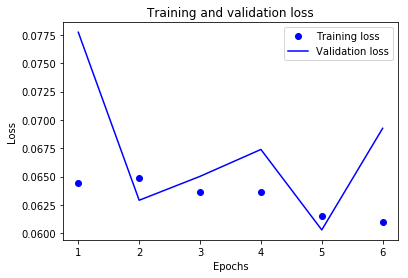

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

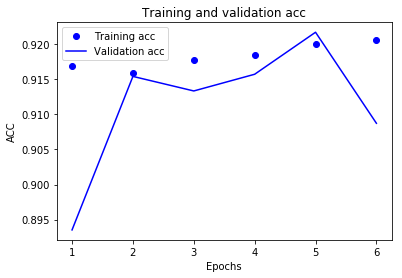

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 33s 627us/step - loss: 0.2426 - acc: 0.7227 - val_loss: 0.1085 - val_acc: 0.8465
Epoch 2/100
52024/52024 [==============================] - 29s 552us/step - loss: 0.1228 - acc: 0.8380 - val_loss: 0.0889 - val_acc: 0.8819
Epoch 3/100
52024/52024 [==============================] - 29s 555us/step - loss: 0.1177 - acc: 0.8511 - val_loss: 0.0967 - val_acc: 0.8889
Epoch 4/100
52024/52024 [==============================] - 29s 556us/step - loss: 0.1095 - acc: 0.8652 - val_loss: 0.0895 - val_acc: 0.8922

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/100
52024/52024 [==============================] - 29s 552us/step - loss: 0.1011 - acc: 0.8742 - val_loss: 0.0817 - val_acc: 0.8964
Epoch 6/100
52024/52024 [==============================] - 30s 567us/step - loss: 0.0984 - acc: 0.8789 - val_loss: 0.0781 - val_acc: 0.8977
Epoch 7/100
52024/52024 [====

0.9134131902265004

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8663840659659717

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8175342465753425

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8412505990809394

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[44482,  2301],
       [ 3330, 14920]])

In [0]:

min_epochs

17

In [0]:

min_val_loss

0.06809039891025055

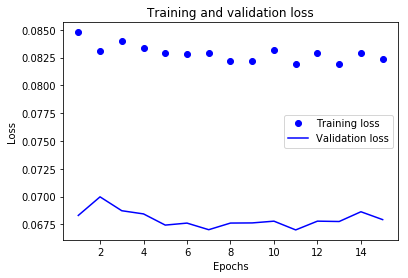

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

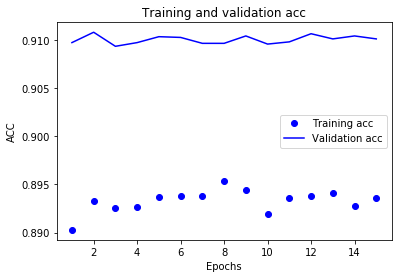

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 31s 599us/step - loss: 0.1378 - acc: 0.8417 - val_loss: 0.0963 - val_acc: 0.8795
Epoch 2/100
52024/52024 [==============================] - 27s 525us/step - loss: 0.0859 - acc: 0.8903 - val_loss: 0.0764 - val_acc: 0.9024
Epoch 3/100
52024/52024 [==============================] - 27s 523us/step - loss: 0.0816 - acc: 0.8950 - val_loss: 0.0866 - val_acc: 0.8934
Epoch 4/100
52024/52024 [==============================] - 27s 520us/step - loss: 0.0782 - acc: 0.8985 - val_loss: 0.0700 - val_acc: 0.9034
Epoch 5/100
52024/52024 [==============================] - 27s 520us/step - loss: 0.0755 - acc: 0.9018 - val_loss: 0.0700 - val_acc: 0.9107
Epoch 6/100
52024/52024 [==============================] - 27s 524us/step - loss: 0.0725 - acc: 0.9048 - val_loss: 0.0746 - val_acc: 0.8963

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/100
52024/52024 [====

0.9193025079574985

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8470155224835973

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8700821917808219

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.858393923831662

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[43915,  2868],
       [ 2371, 15879]])

In [0]:

min_epochs

7

In [0]:

min_val_loss

0.06441261384476063

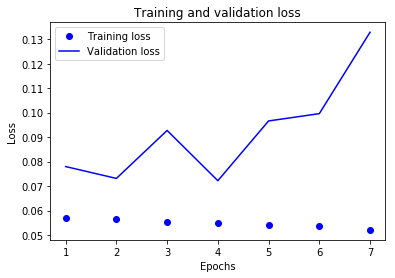

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

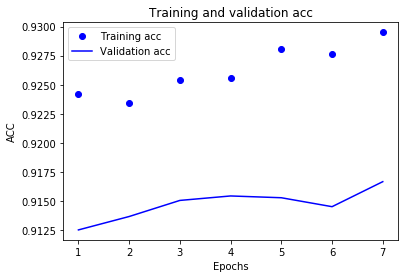

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 34s 663us/step - loss: 0.3297 - acc: 0.6642 - val_loss: 0.3363 - val_acc: 0.7167
Epoch 2/100
52024/52024 [==============================] - 30s 568us/step - loss: 0.1324 - acc: 0.8213 - val_loss: 0.2920 - val_acc: 0.7169
Epoch 3/100
52024/52024 [==============================] - 29s 563us/step - loss: 0.1114 - acc: 0.8564 - val_loss: 0.2445 - val_acc: 0.7167
Epoch 4/100
52024/52024 [==============================] - 29s 566us/step - loss: 0.1027 - acc: 0.8686 - val_loss: 0.1485 - val_acc: 0.8151
Epoch 5/100
52024/52024 [==============================] - 30s 572us/step - loss: 0.0928 - acc: 0.8811 - val_loss: 0.0863 - val_acc: 0.8754
Epoch 6/100
52024/52024 [==============================] - 29s 564us/step - loss: 0.0891 - acc: 0.8853 - val_loss: 0.0989 - val_acc: 0.8715
Epoch 7/100
52024/52024 [==============================] - 29s 566us/step - loss: 0.0854 - acc: 0.8889 - val_l

0.9184260298617625

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8758492538180129

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8264657534246576

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8504412054918102

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[44645,  2138],
       [ 3167, 15083]])

In [0]:

min_epochs

13

In [0]:

min_val_loss

0.06400662901037073

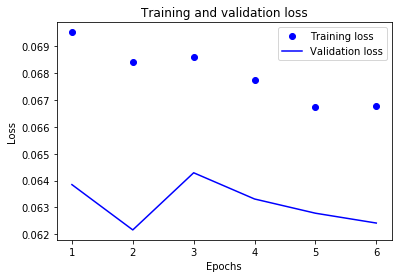

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

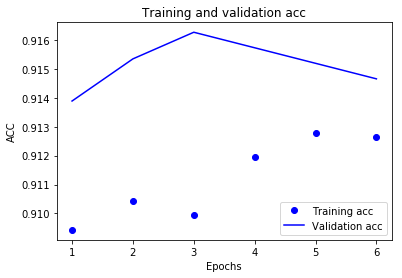

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('selu'))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 36s 683us/step - loss: 0.1766 - acc: 0.8411 - val_loss: 0.0824 - val_acc: 0.8954
Epoch 2/100
52024/52024 [==============================] - 30s 576us/step - loss: 0.0958 - acc: 0.8819 - val_loss: 0.0979 - val_acc: 0.8921
Epoch 3/100
52024/52024 [==============================] - 30s 577us/step - loss: 0.0888 - acc: 0.8898 - val_loss: 0.0931 - val_acc: 0.8760

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/100
52024/52024 [==============================] - 30s 573us/step - loss: 0.0773 - acc: 0.9006 - val_loss: 0.0795 - val_acc: 0.9034
Epoch 5/100
52024/52024 [==============================] - 30s 576us/step - loss: 0.0785 - acc: 0.8992 - val_loss: 0.0844 - val_acc: 0.8866
Epoch 6/100
52024/52024 [==============================] - 30s 577us/step - loss: 0.0760 - acc: 0.9036 - val_loss: 0.0880 - val_acc: 0.9104

Epoch 00006: ReduceLROnPlate

0.9183183922008826

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8904514727184935

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8083835616438356

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8474352346487449

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[44968,  1815],
       [ 3497, 14753]])

In [0]:

min_epochs

15

In [0]:

min_val_loss

0.05869710910299202

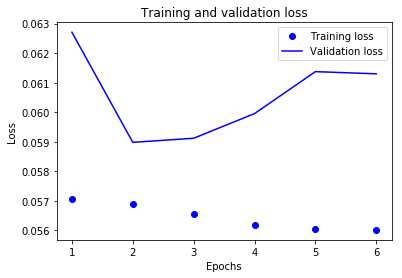

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

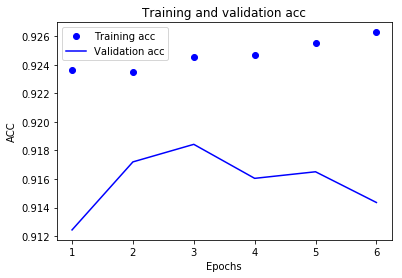

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 39s 745us/step - loss: 0.4167 - acc: 0.6952 - val_loss: 0.1065 - val_acc: 0.8668
Epoch 2/100
52024/52024 [==============================] - 32s 607us/step - loss: 0.1271 - acc: 0.8364 - val_loss: 0.0984 - val_acc: 0.8779
Epoch 3/100
52024/52024 [==============================] - 32s 608us/step - loss: 0.1178 - acc: 0.8524 - val_loss: 0.1144 - val_acc: 0.8632
Epoch 4/100
52024/52024 [==============================] - 32s 606us/step - loss: 0.1118 - acc: 0.8604 - val_loss: 0.0845 - val_acc: 0.8930
Epoch 5/100
52024/52024 [==============================] - 32s 606us/step - loss: 0.1031 - acc: 0.8727 - val_loss: 0.1048 - val_acc: 0.8681
Epoch 6/100
52024/52024 [==============================] - 32s 610us/step - loss: 0.0998 - acc: 0.8740 - val_loss: 0.0818 - val_acc: 0.8845
Epoch 7/100
52024/52024 [==============================] - 32s 611us/step - loss: 0.0941 - acc: 0.8823 - val_l

0.9183030153921855

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8618741258741259

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8441643835616438

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8529273356401383

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[44314,  2469],
       [ 2844, 15406]])

In [0]:

min_epochs

20

In [0]:

min_val_loss

0.06273097525003267

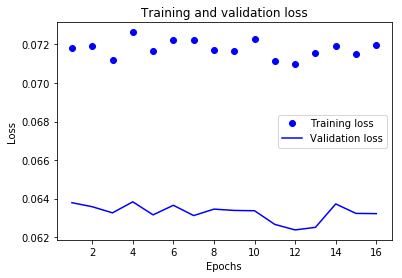

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

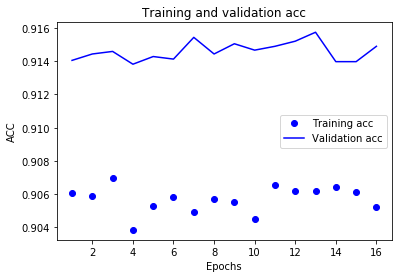

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('swish'))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('swish'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 36s 690us/step - loss: 0.1208 - acc: 0.8620 - val_loss: 0.0826 - val_acc: 0.8918
Epoch 2/100
52024/52024 [==============================] - 29s 558us/step - loss: 0.0814 - acc: 0.8925 - val_loss: 0.0765 - val_acc: 0.8962
Epoch 3/100
52024/52024 [==============================] - 29s 562us/step - loss: 0.0780 - acc: 0.8980 - val_loss: 0.0831 - val_acc: 0.8939
Epoch 4/100
52024/52024 [==============================] - 29s 557us/step - loss: 0.0756 - acc: 0.9018 - val_loss: 0.1033 - val_acc: 0.8750

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/100
52024/52024 [==============================] - 29s 558us/step - loss: 0.0697 - acc: 0.9093 - val_loss: 0.0696 - val_acc: 0.9053
Epoch 6/100
52024/52024 [==============================] - 29s 565us/step - loss: 0.0688 - acc: 0.9101 - val_loss: 0.0629 - val_acc: 0.9139
Epoch 7/100
52024/52024 [====

0.9243614780188519

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8680766469711193

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8613698630136987

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8647102505569461

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[44394,  2389],
       [ 2530, 15720]])

In [0]:

min_epochs

6

In [0]:

min_val_loss

0.06293300153150441

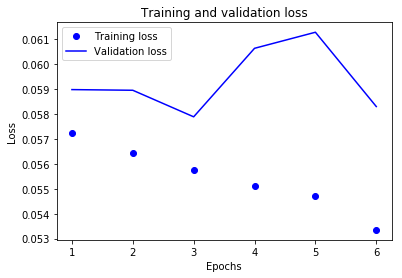

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

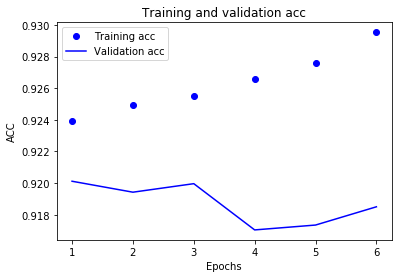

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=500, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('swish'))
model.add(Dropout(0.5))

for i in range(9):
    model.add(Dense(units=500, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('swish'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 52024 samples, validate on 13007 samples
Epoch 1/100
52024/52024 [==============================] - 39s 744us/step - loss: 0.2813 - acc: 0.7289 - val_loss: 0.1243 - val_acc: 0.8196
Epoch 2/100
52024/52024 [==============================] - 31s 594us/step - loss: 0.1076 - acc: 0.8597 - val_loss: 0.0929 - val_acc: 0.8764
Epoch 3/100
52024/52024 [==============================] - 31s 592us/step - loss: 0.0946 - acc: 0.8789 - val_loss: 0.0919 - val_acc: 0.8669
Epoch 4/100
52024/52024 [==============================] - 31s 593us/step - loss: 0.0894 - acc: 0.8844 - val_loss: 0.0822 - val_acc: 0.8891
Epoch 5/100
52024/52024 [==============================] - 31s 594us/step - loss: 0.0861 - acc: 0.8887 - val_loss: 0.0743 - val_acc: 0.8979
Epoch 6/100
52024/52024 [==============================] - 31s 591us/step - loss: 0.0831 - acc: 0.8918 - val_loss: 0.0884 - val_acc: 0.8773
Epoch 7/100
52024/52024 [==============================] - 31s 588us/step - loss: 0.0805 - acc: 0.8964 - val_l

0.9209632032967878

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.8778533548535854

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.8344657534246576

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8556098657227934

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[44664,  2119],
       [ 3021, 15229]])

In [0]:

min_epochs

20

In [0]:

min_val_loss

0.05981182973959916

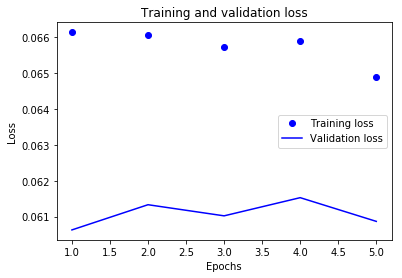

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

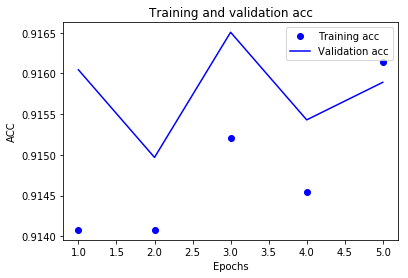

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()